<a id='start'></a>
# Lezione 2 - Esercizi

#### Utilizziamo ed esploariamo un dataset di Pandas.

Provate a svolgere i seguenti esercizi: <br>
1) [Plottare grafici per età di uomini e donne](#section1)<a href='#section1'></a> <br>
2) [Rappresentare i morti/sopravvissuti per ogni classe](#section2)<a href='#section2'></a><br>
3) [Creare un grafico a torta dei soldi spesi per i biglietti](#section3)<a href='#section3'></a> <br>
4) [Fitting di un istogramma](#section4)<a href='#section4'></a> <br>
5) [Correzione tra prezzo biglietto ed età?](#section5)<a href='#section5'></a> <br>
6) [Correlazioni in SerieA?](#section6)<a href='#section6'></a> <br>
7) [Statistica descrittiva](#section7)<a href='#section7'></a>

Importiamo il dataset del Titanic

In [8]:
import pandas as pd

titanic = pd.read_csv("data/train_dataset_titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id='section1'></a>
## Plottare grafici per età di uomini e donne

Effettuare dei calcoli sulle età degli uomini e delle donne.<br>
Per risolvere l'esercizio:
1. Calcolare le principali statistiche delle serie delle età delle donne e degli uomini
2. Rappresentare le età degli uomini e delle donne su due distinti istrogrammi, per ognuno dei due istogrammi provare a fittare i dati con una fistribuzione normale e disegnare la funzione di fit calcolata.

In [9]:
donne = titanic.loc[titanic.Sex == "female"]
media_donne = donne.Age.mean()
std_donne = donne.Age.std()
print("L'età media delle donne era di: %d anni e la deviazione standard %.2f." % (media_donne, std_donne))

uomini = titanic.loc[titanic.Sex == "male"]
media_uomini = uomini.Age.mean()
std_uomini = uomini.Age.std()
print("L'età media degli uomini era di: %d anni e la deviazione standard %.2f." % (media_uomini, std_uomini))

L'età media delle donne era di: 27 anni e la deviazione standard 14.11.
L'età media degli uomini era di: 30 anni e la deviazione standard 14.68.


In [10]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
donne.Age.describe()

count    261.000000
mean      27.915709
std       14.110146
min        0.750000
25%       18.000000
50%       27.000000
75%       37.000000
max       63.000000
Name: Age, dtype: float64

In [12]:
uomini.Age.describe()

count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
from scipy.stats import norm
help(norm.pdf)

Help on method pdf in module scipy.stats._distn_infrastructure:

pdf(x, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Probability density function at x of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    pdf : ndarray
        Probability density function evaluated at x



/var/folders/fy/5ftynfvs4r5c5z37g3c9nw780000gn/T/ipykernel_12155/1755729349.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', color="red", linewidth=2)


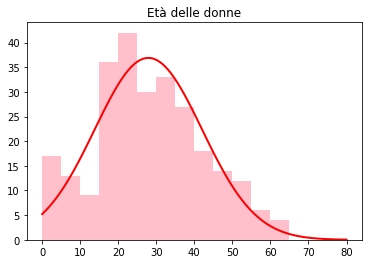

/var/folders/fy/5ftynfvs4r5c5z37g3c9nw780000gn/T/ipykernel_12155/1755729349.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', color="blue", linewidth=2)


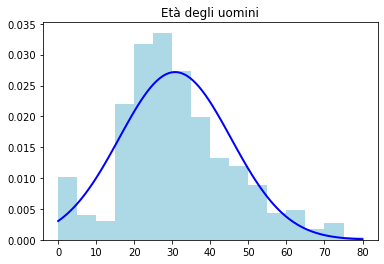

In [14]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

max_bin = 80
num_bin = 16
xmin, xmax = 0, max_bin

# Creiamo l'istogramma per le donne non normalizzato
plt.hist(donne.Age, bins=num_bin, range=[xmin, xmax], color="pink")
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media_donne, std_donne)
# La funzione gaussiana va moltiplicata per una costante che è 
# l'integrale dell'istogramma (ovvero base per altezza di ogni bin)
p *= donne.Age.count() * max_bin/num_bin
plt.plot(x, p, 'k', color="red", linewidth=2)
plt.title("Età delle donne")
plt.show()

# Cresiamo l'istogramma per gli uomini normalizzando i dati
plt.hist(uomini.Age, bins=num_bin, range=[xmin, xmax], density=True, color="lightblue")
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media_uomini, std_uomini)
plt.plot(x, p, 'k', color="blue", linewidth=2)
plt.title("Età degli uomini")
plt.show()

Gli errori che si vedono derivano dal fatto che alcuni passeggeri hanno NaN come valore per l'età e quindi la libreria pyplot non sa come disegnare quel valore nell'istogramma.

In [15]:
u = uomini[uomini.Age.notnull()]
d = donne[donne.Age.notnull()]

/var/folders/fy/5ftynfvs4r5c5z37g3c9nw780000gn/T/ipykernel_12155/1667001111.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', color="red", linewidth=2)


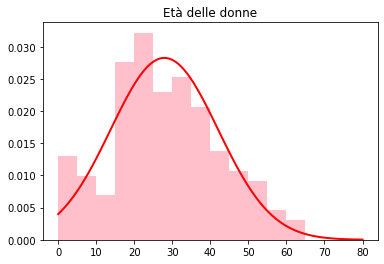

/var/folders/fy/5ftynfvs4r5c5z37g3c9nw780000gn/T/ipykernel_12155/1667001111.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', color="red", linewidth=2)


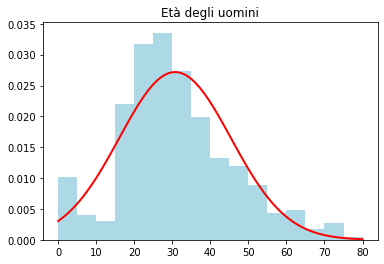

In [16]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

max_bin = 80
num_bin = 16
xmin, xmax = 0, max_bin

plt.hist(d.Age, bins=num_bin, range=[xmin, xmax], density=True, color="pink")
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media_donne, std_donne)
plt.plot(x, p, 'k', color="red", linewidth=2)
plt.title("Età delle donne")
plt.show()

plt.hist(u.Age, bins=num_bin, range=[xmin, xmax], density=True, color="lightblue")
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media_uomini, std_uomini)
plt.plot(x, p, 'k', color="red", linewidth=2)
plt.title("Età degli uomini")
plt.show()

<a id='section2'></a>
## Rappresentare i morti/sopravvissuti per ogni classe

Rappresentare in un grafico a pila il numero di morti e sopravvissuti per ogni classe di servizio del viaggio (prima classe, seconda classe, terza classe).

In [17]:
byclass = titanic.groupby(['Pclass', 'Survived'])['PassengerId'].aggregate(['count'])
byclass

count
Pclass Survived       
1      0            80
       1           136
2      0            97
       1            87
3      0           372
       1           119

Abbiamo ottenuto il risultato che ci interessava, ma i dati hanno due indici (PClass e Survived) e un solo valore.

Utilizzando il metodo unstack possiamo far diventare l'indice Survived una nuova dimensione in modo da avere una matrice:

In [18]:
chart_data = byclass.unstack()
chart_data = chart_data.rename_axis('classe')
chart_data

count     
Survived     0    1
classe             
1           80  136
2           97   87
3          372  119

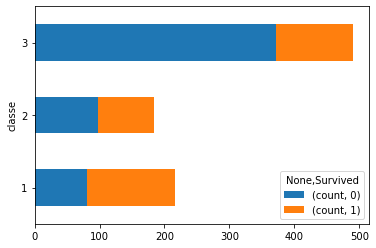

In [19]:
ax = chart_data.plot.barh(stacked=True)
plt.show()

<a id='section3'></a>
## Creare un grafico a torta dei soldi spesi per i biglietti

Creare un grafico a torta che rappresenti il costo complessivo dei biglietti degli uomini e delle donne.

In [20]:
fare_bysex = titanic.groupby(['Sex'])['Fare'].aggregate(['sum']).unstack()
fare_bysex = fare_bysex.rename("prezzo")
fare_bysex

     Sex   
sum  female    13966.6628
     male      14727.2865
Name: prezzo, dtype: float64

<AxesSubplot:ylabel='prezzo'>

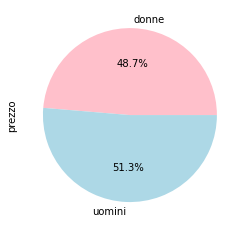

In [21]:
fare_bysex.plot.pie(colors=['pink', 'lightblue'], labels=['donne', 'uomini'], autopct='%1.1f%%')

<a id='section4'></a>
## Fitting di un istogramma 

Scaricate il file `data1.txt` e realizzate un programma che legga e fitti i dati in esso contenuti. Il fitting potrà essere effettuato con una funzione gaussiana. Quindi fittate i dati e mostrate i risultati del fitting. 

Fare lo stesso con i dati nel file `data2.txt`.
In questo caso il fitting dovrà avvenire con una funzione risultato della composizione di più funzioni (una per il background e una per i segnali).

Il chi quando calcolato è: 0.27320682752327613.


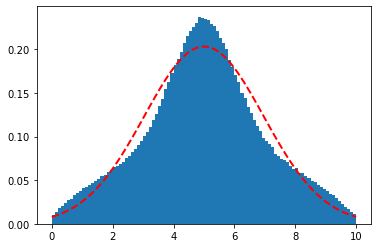

In [22]:
from scipy.stats import norm
import matplotlib.pyplot as plt

data = pd.read_csv('data/data1.txt', header=None)
data.columns = ["values"]

(mu, sigma) = norm.fit(data["values"])
n, bins, patches = plt.hist(data["values"], bins=100, density=True)

# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

# let's compute chi-square
chi = sum([((b - a)**2)/a for a, b in zip(n, y)])
print(f'Il chi quando calcolato è: {chi}.')

Proviamo a costruire il fit "a mano" partendo da una definzione di una funzione di fit e usando il metodo `curve_fit` (ci verrà comodo per l'altra parte dell'esercizio!).

Il chi quando calcolato è: 0.322459484380978.


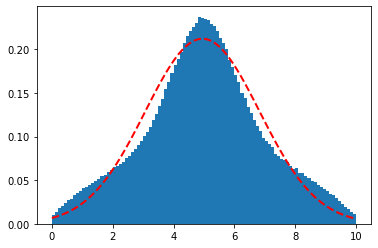

In [23]:
from scipy.stats import norm
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

def fit_fuct(x, mean, std):
    f = norm(mean, std)
    return f.pdf(x)

data = pd.read_csv('data/data1.txt', header=None)
data.columns = ["values"]

(mu, sigma) = norm.fit(data["values"])
n, bins, patches = plt.hist(data["values"], bins=100, density=True)

bin_starts = [b for b in bins[:-1]]

popt, _ = curve_fit(fit_fuct, bin_starts, n)
y = [fit_fuct(b, *popt) for b in bin_starts]

# add a 'best fit' line
l = plt.plot(bin_starts, y, 'r--', linewidth=2)

# let's compute chi-square
chi = sum([((b - a)**2)/a for a, b in zip(n, y)])
print(f'Il chi quando calcolato è: {chi}.')

Così facendo ci è anche possibile creare una funzione di fit sull'istogramma non normalizzato (aggiungendo un fattore di scala K alla funzione della gaussiana).

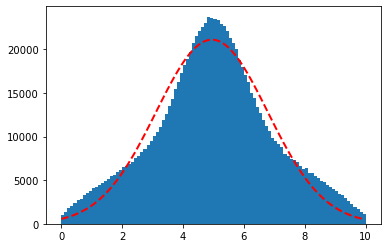

In [24]:
from scipy.stats import norm
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

def fit_fuct(x, mean, std, k):
    f = norm(mean, std)
    return k * f.pdf(x)

data = pd.read_csv('data/data1.txt', header=None)
data.columns = ["values"]

(mu, sigma) = norm.fit(data["values"])
n, bins, patches = plt.hist(data["values"], bins=100)

bin_starts = [b for b in bins[:-1]]

popt, _ = curve_fit(fit_fuct, bin_starts, n)
y = [fit_fuct(b, *popt) for b in bin_starts]

# add a 'best fit' line
l = plt.plot(bin_starts, y, 'r--', linewidth=2)

Proviamo ora a fittare i dati nel scondo file, usando una funziona di fit che è la composizione di background e segnali.

/var/folders/fy/5ftynfvs4r5c5z37g3c9nw780000gn/T/ipykernel_12155/461616780.py:10: RuntimeWarning: overflow encountered in exp
  b = intercept * np.exp(-x/exp)


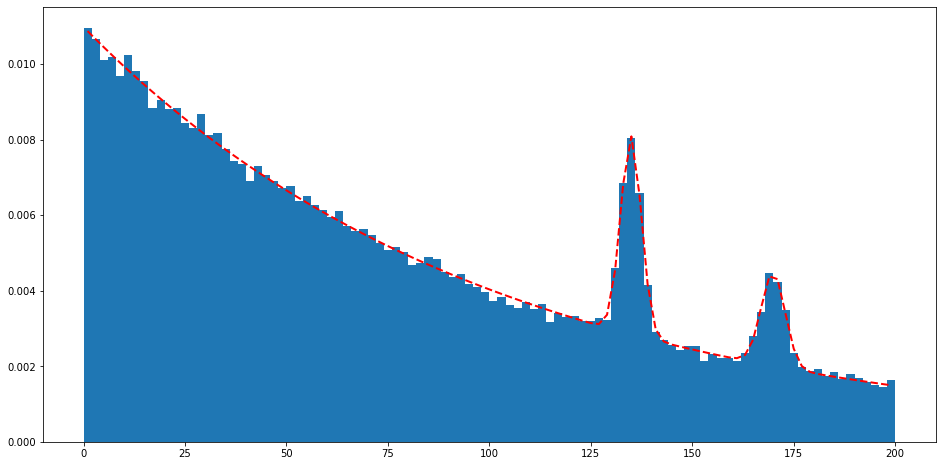

In [25]:
from scipy.stats import norm
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))

def fit_fuct(x, intercept, exp, k1, mean1, std1, k2, mean2, std2):
    # exponential background
    b = intercept * np.exp(-x/exp)
    
    # first signal
    f1 = norm(mean1, std1)
    
    # second signal
    f2 = norm(mean2, std2)

    return b + k1 * f1.pdf(x) + k2 * f2.pdf(x)

data = pd.read_csv('data/data2.txt', header=None)
data.columns = ["values"]

(mu, sigma) = norm.fit(data["values"])
n, bins, patches = plt.hist(data["values"], bins=100, density=True)

bin_centers = [bins[i] + (bins[i+1] - bins[i])/2 for i in range(len(bins)-1)]

#let's help the fit, all initial parameters default to 1 unless differently specified here
initial_params = [1, 1, 1, 130, 1, 1, 170, 1]
popt, _ = curve_fit(fit_fuct, bin_centers, n, initial_params)
y = [fit_fuct(b, *popt) for b in bin_centers]

# add a 'best fit' line
l = plt.plot(bin_centers, y, 'r--', linewidth=2)

<a id='section5'></a>
## Correlazione tra prezzo biglietto ed età? 

Verificare se esiste una correlazione tra l'età del passeggero e il prezzo pagato per il biglietto. <br>
La correlezione può essere vista ad occhio facendo un grafico scatter o calcolata con un indice di correlazione.

<AxesSubplot:xlabel='Age', ylabel='Fare'>

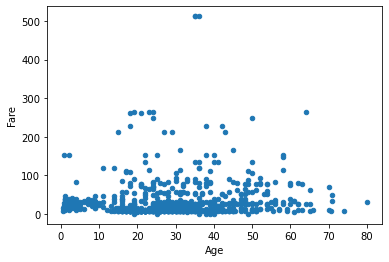

In [26]:
titanic.plot.scatter(x='Age', y='Fare')

In [27]:
titanic[['Age', 'Fare']].corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


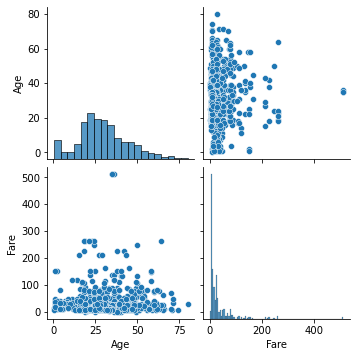

In [28]:
import seaborn as sns

ax = sns.pairplot(titanic[['Age', 'Fare']])
plt.show()

<a id='section6'></a>
## Correlazioni in SerieA? 

Riprendiamo il dataset sulla classifica di Serie A e vediamo se il numero di gol e le partite vinte, pareggiate e perse (in casa e fuori casa) correlano con il punteggio ottenuto in classifica.

In [29]:
classifica_serie_a = pd.read_html(io="http://www.legaseriea.it/it/serie-a/classifica", skiprows=1, header=0)
classifica_serie_a = classifica_serie_a[0]
classifica_serie_a

,SQUADRE,PUNTI,G,V,N,P,G.1,V.1,N.1,P.1,G.2,V.2,N.2,P.2,F,S
0,1 Milan,66,30,20,6,4,15,9,3,3,15,11,3,1,56,29
1,2 Napoli,63,30,19,6,5,15,9,2,4,15,10,4,1,53,22
2,3 Inter,60,29,17,9,3,15,10,3,2,14,7,6,1,62,24
3,4 Juventus,59,30,17,8,5,15,9,3,3,15,8,5,2,47,26
4,5 Atalanta,51,29,14,9,6,14,4,6,4,15,10,3,2,51,31
5,6 Roma,51,30,15,6,9,16,9,4,3,14,6,2,6,50,35
6,7 Lazio,49,30,14,7,9,14,8,4,2,16,6,3,7,58,45
7,8 Fiorentina,47,29,14,5,10,14,9,2,3,15,5,3,7,48,38
8,9 Sassuolo,43,30,11,10,9,15,5,5,5,15,6,5,4,55,49
9,10 Hellas Verona,42,30,11,9,10,15,8,2,5,15,3,7,5,55,47


In [30]:
classifica_serie_a[['PUNTI', 'V.1', 'N.1', 'P.1', 'V.2', 'N.2', 'P.2', 'F', 'S']].corr()

,PUNTI,V.1,N.1,P.1,V.2,N.2,P.2,F,S
PUNTI,1.000000,0.875098,-0.466826,-0.768594,0.879089,0.028153,-0.829053,0.886113,-0.861568
V.1,0.875098,1.000000,-0.645863,-0.792536,0.580127,-0.019784,-0.541105,0.805813,-0.789580
N.1,-0.466826,-0.645863,1.000000,0.081265,-0.362456,0.232291,0.185589,-0.452732,0.289768
P.1,-0.768594,-0.792536,0.081265,1.000000,-0.483795,-0.091481,0.515043,-0.705732,0.770264
V.2,0.879089,0.580127,-0.362456,-0.483795,1.000000,-0.174867,-0.805431,0.737771,-0.682441
N.2,0.028153,-0.019784,0.232291,-0.091481,-0.174867,1.000000,-0.407893,0.110981,-0.106395
P.2,-0.829053,-0.541105,0.185589,0.515043,-0.805431,-0.407893,1.000000,-0.723769,0.739275
F,0.886113,0.805813,-0.452732,-0.705732,0.737771,0.110981,-0.723769,1.000000,-0.632266
S,-0.861568,-0.789580,0.289768,0.770264,-0.682441,-0.106395,0.739275,-0.632266,1.000000


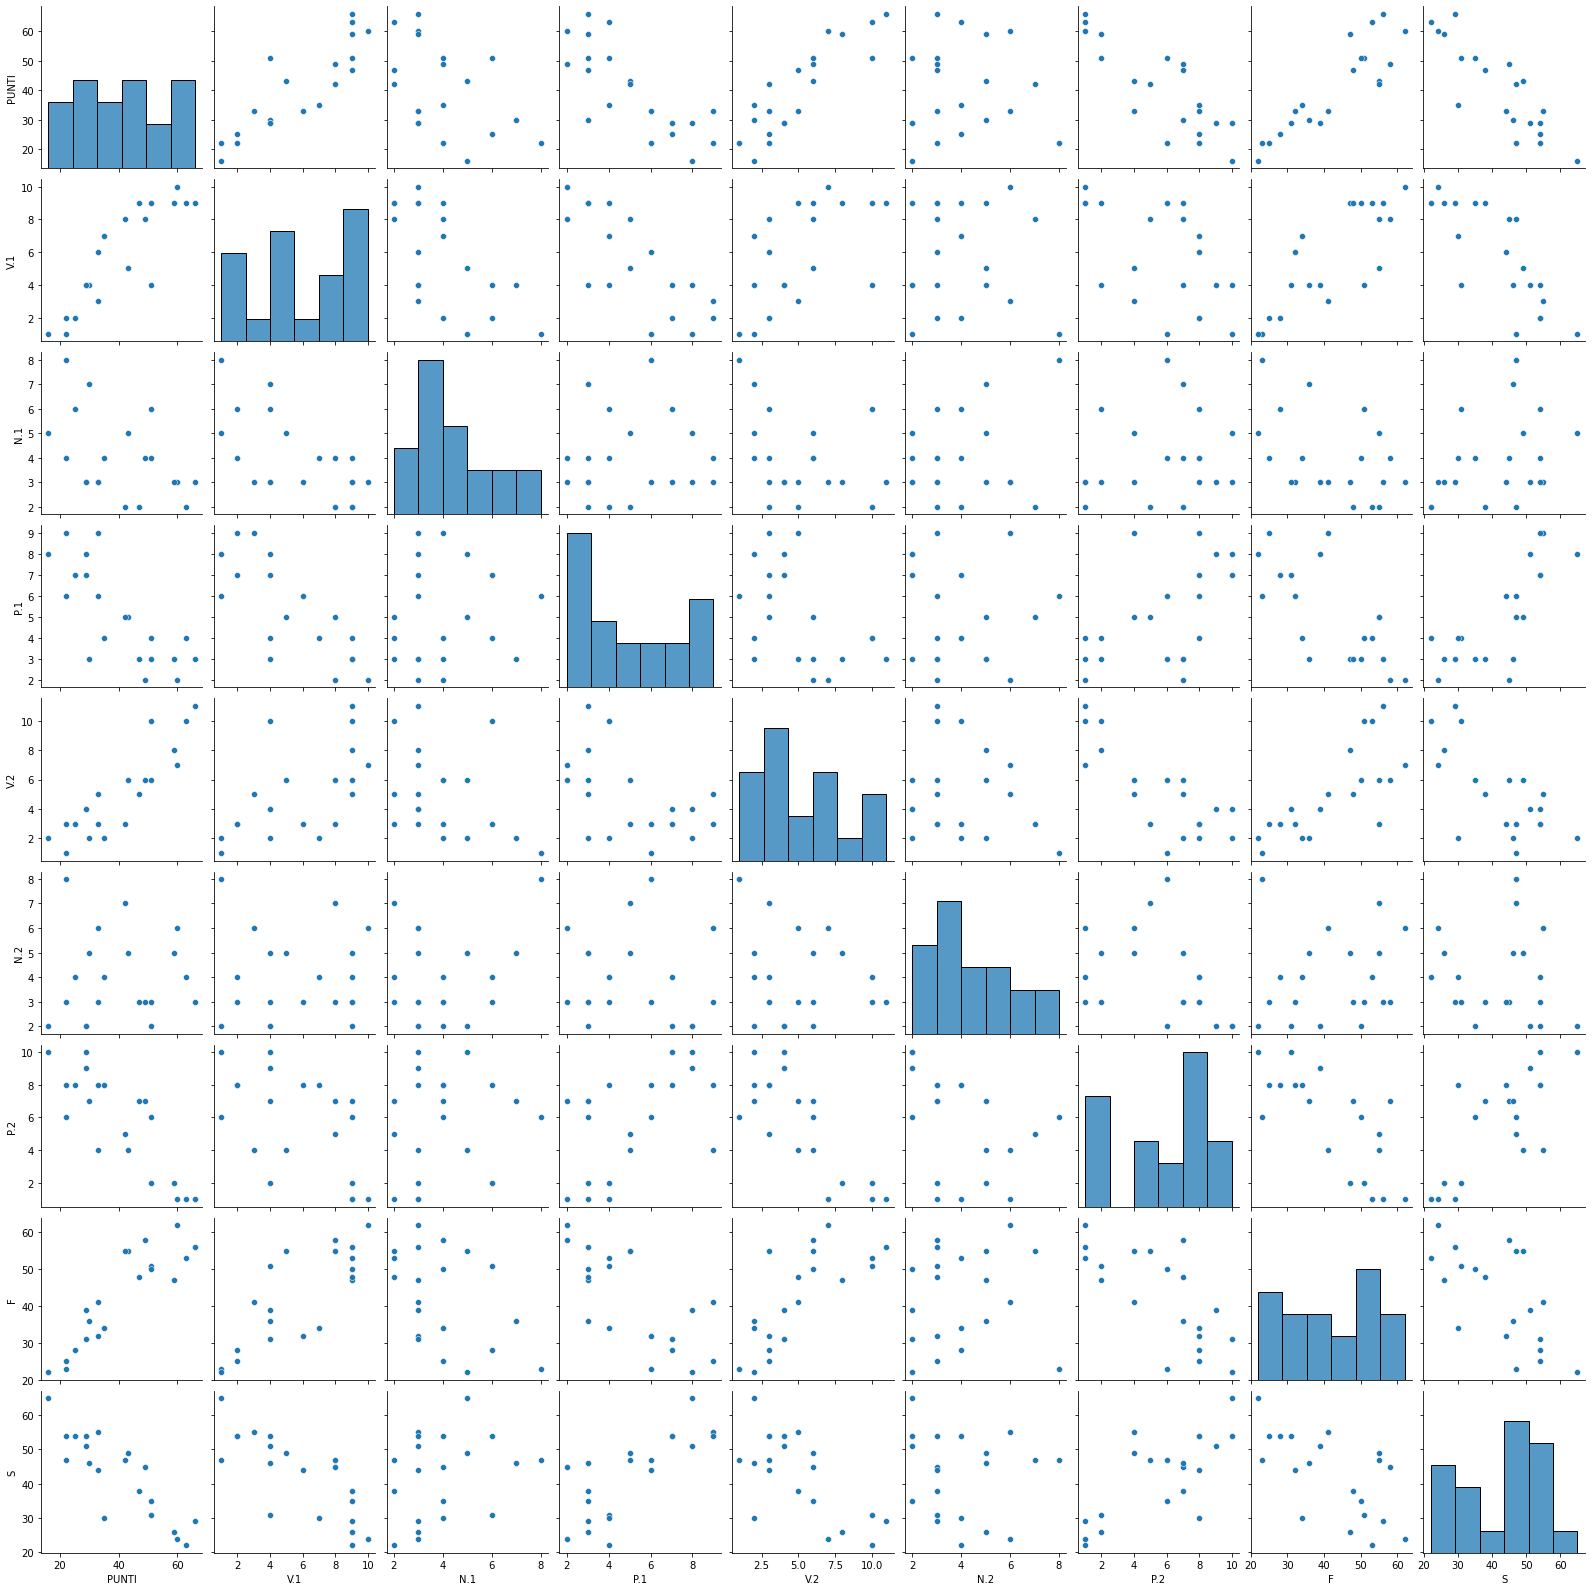

In [31]:
import seaborn as sns

ax = sns.pairplot(classifica_serie_a[['PUNTI', 'V.1', 'N.1', 'P.1', 'V.2', 'N.2', 'P.2', 'F', 'S']])
plt.show()

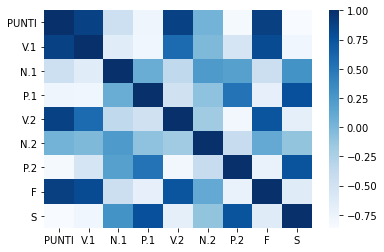

In [32]:
import seaborn as sns

sns.heatmap(classifica_serie_a[['PUNTI', 'V.1', 'N.1', 'P.1', 'V.2', 'N.2', 'P.2', 'F', 'S']].corr(), cmap="Blues")
plt.show()

<a id='section7'></a>
## Statistica descrittiva

Calcola le misure di tedenza e viaribility del seguente dataset <a href='https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston' > riguardante i prezzi delle case di Boston</a>:

In [33]:
from sklearn.datasets import load_boston
boston = load_boston()
dataset_boston = boston.data
print("Dataset's dimension:", dataset_boston.shape)

Dataset's dimension: (506, 13)


/opt/anaconda3/envs/jupyter/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

In [34]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [35]:
df_boston = pd.DataFrame(dataset_boston, columns = boston.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [36]:
from scipy import stats

# Mean of CRIM feature
mean = df_boston.CRIM.mean()
print(f"Mean of INDUS: {mean}")

# Median of INDUS feature
median = df_boston.INDUS.mean()
print(f"Median of INDUS: {median}")

# Trimmed Mean excluding 20% of first and last data of INDUS feature
# (you can try to define a trimmed function)
INDUS_sort = df_boston.INDUS.sort_values()
INDUS_sort = INDUS_sort.reset_index(drop = True)

limit = 0.2
limits = (INDUS_sort[round(df_boston.INDUS.shape[0]*limit)], INDUS_sort[round(df_boston.INDUS.shape[0]*(1-limit))])

trimmed_mean = stats.tmean(INDUS_sort, limits=limits)

print("INDUS trimmed mean:", round(trimmed_mean,2), "with the following limits:", limits)

# Variance LSTAT
variance = df_boston.LSTAT.var()
print("LSTAT's variance:", round(variance,2))
print("-----------------------------")

# Standard Deviation LSTAT
st_dev = df_boston.LSTAT.std()
print("LSTAT's standard deviation:", round(st_dev,2))
print("-----------------------------")

# Median absolute deviation from median
mean_absolute_deviation = df_boston.LSTAT.mad()
print("LSTAT's mean absolute deviation:", round(mean_absolute_deviation, 2))
print("-----------------------------")



Mean of INDUS: 3.6135235573122535
Median of INDUS: 11.136778656126504
INDUS trimmed mean: 11.83 with the following limits: (4.39, 18.1)
LSTAT's variance: 50.99
-----------------------------
LSTAT's standard deviation: 7.14
-----------------------------
LSTAT's mean absolute deviation: 5.72
-----------------------------


[Clicca qui per tornare all'inizio della pagina](#start)<a id='start'></a>